In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\PAWAN\\Downloads\\train.csv")
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [3]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [4]:
data.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [7]:
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [8]:
x= data[['years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque']]

y= data["current price"]

In [34]:
x_numerical = x.select_dtypes("float").columns
x_numerical

Index(['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp',
       'torque'],
      dtype='object')

In [39]:
from scipy.stats import skew


for i in x_numerical:
    
    print(f"{i} : {skew(x[i])}")
    

years : -0.029618369806118632
km : -0.022589751067435843
rating : -0.004798978143960932
condition : -0.060243266692068816
economy : -0.061599696605716486
top speed : 0.06443847229323796
hp : 0.023449408470763242
torque : -0.005666205784967534


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,years,km,rating,condition,economy,top speed,hp,torque
0,0.2,0.287423,0.00,0.111111,0.857143,0.646154,0.328571,0.763889
1,0.8,0.671795,1.00,0.888889,0.142857,0.200000,0.342857,0.375000
2,0.0,0.825624,0.25,0.777778,1.000000,0.707692,0.042857,0.402778
3,0.4,0.509560,0.75,0.222222,0.428571,0.953846,0.057143,0.666667
4,0.8,0.112826,0.50,0.888889,0.571429,0.384615,0.042857,0.513889
...,...,...,...,...,...,...,...,...
995,0.6,0.750849,0.00,0.555556,0.428571,0.553846,0.642857,0.402778
996,0.4,0.331860,0.25,0.888889,0.857143,0.400000,0.728571,0.722222
997,1.0,0.365523,0.00,0.777778,0.142857,0.938462,0.900000,0.291667
998,0.0,0.905361,0.75,0.444444,0.142857,0.753846,0.885714,0.833333


In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [15]:
model.score(x_test,y_test)

0.895183230908271

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [33]:
y_predicted = model.predict(x_test)


mean_absolute_error=mean_absolute_error(y_predicted,y_test),
mean_squared_error=mean_squared_error(y_predicted,y_test),
root_mean_squared_error=root_mean_squared_error(y_predicted,y_test)

print(f"mean absolute error {mean_absolute_error}")
print(f"mean squared error {mean_squared_error}")
print(f"root mean squared error {root_mean_squared_error}")



mean absolute error (34872.93998349479,)
mean squared error (1762071864.765075,)
root mean squared error 41977.03973322886


In [50]:
print(y_predicted[0],y_test.iloc[:1])

364392.5432013195 521    383570.5
Name: current price, dtype: float64


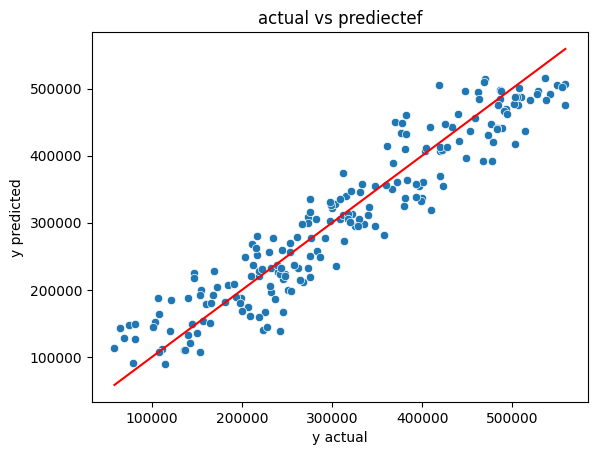

In [69]:
sns.scatterplot(x= y_test,y= y_predicted)
plt.xlabel("y actual")
plt.ylabel("y predicted")
plt.title("actual vs prediectef")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color = "red"
         ) 
plt.show()